# Advanced Lane Detection Pipeline
## import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utilities import thresholds
from utilities import image_utility
from utilities import calibration
from  utilities import lane_finder

## Load the camera calibration

In [2]:
c = calibration.CameraCalibration()
c.load_calibration('././camera_cal/')

## Read the image and undistorted base on the camera calibration

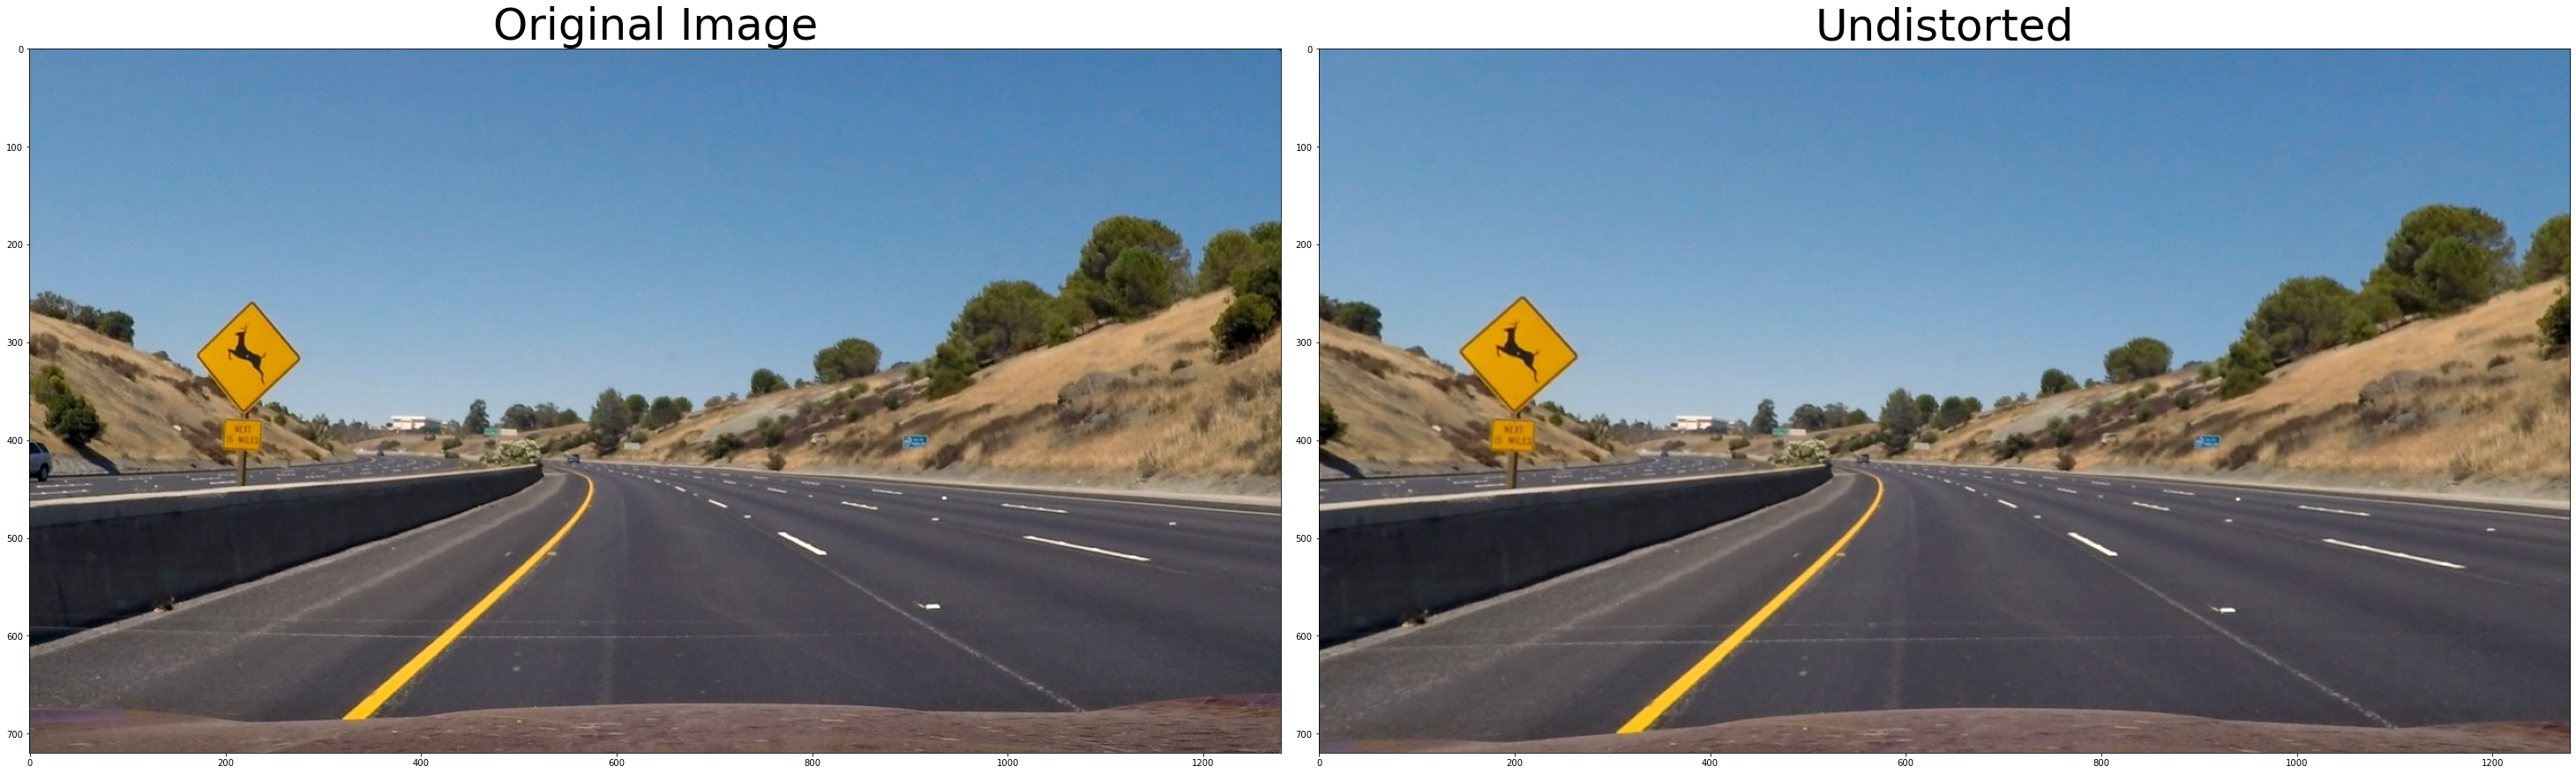

In [3]:
img = cv2.imread('test_images/test2.jpg')
undistort,mtx,dist =c.undistort_image(img)

# Plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(undistort,cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Warp the image to see it on bird view and detect the lanes
Using the sobel algorithm to find the derivates and gradients, also use the hsv color space to avoid having issues between yellow and white lanes.

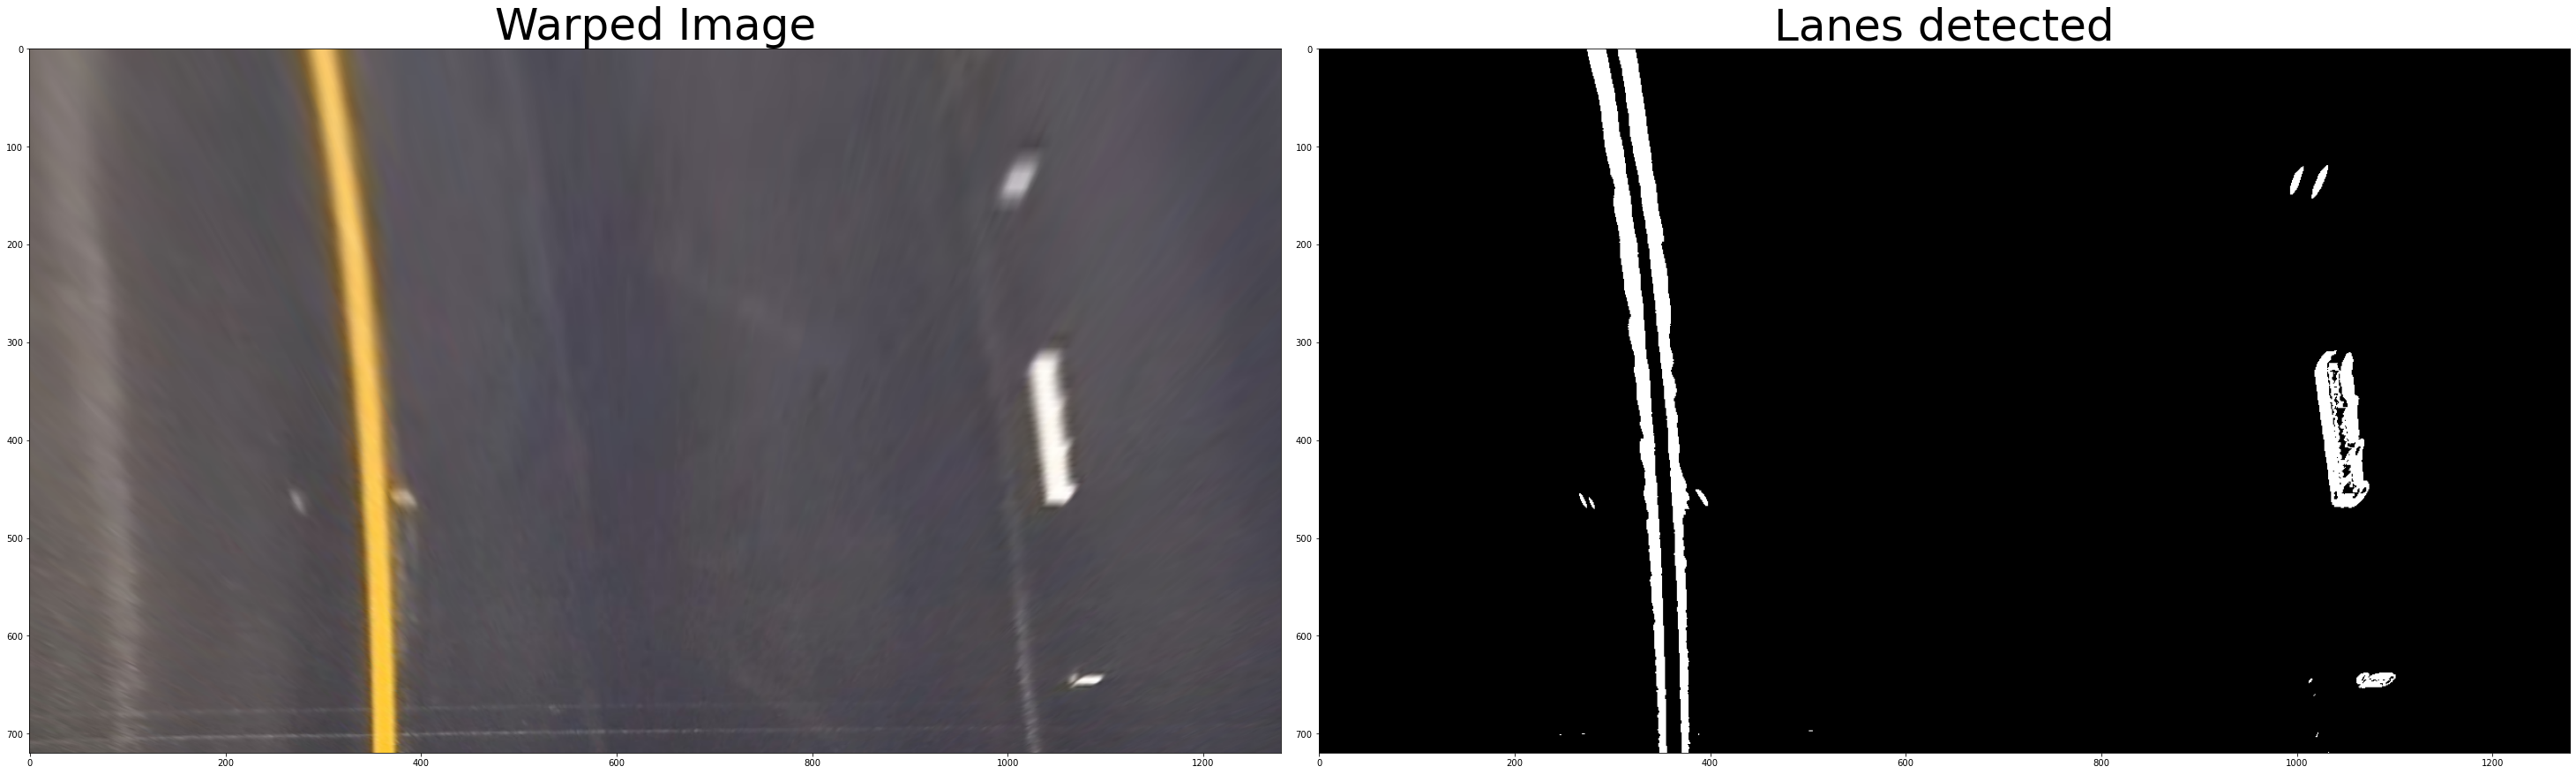

In [4]:
warped = image_utility.warp_image(undistort,140,470,100)
combined_binary,s_binary = thresholds.highlight_features(warped,7,(50,150),(50,200),(0.5,np.pi/2),(80,200))

# Plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
f.tight_layout()
ax1.imshow(cv2.cvtColor(warped,cv2.COLOR_BGR2RGB))
ax1.set_title('Warped Image', fontsize=50)
ax2.imshow(combined_binary,cmap='gray')
ax2.set_title('Lanes detected', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Calculate the histogram to find where the lanes are located

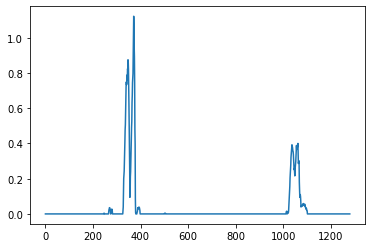

In [5]:
hist = image_utility.calculate_histogram(combined_binary)
plt.plot(hist)

## Find the lanes using sliding windows
- The lanes are found, left and right are colour differently
- The windows are drawn
- The curvatures are calculated, both real and pixels

(4566.950199022176, 74454.62461611323) (4737.900787036774, 74711.49321953932)


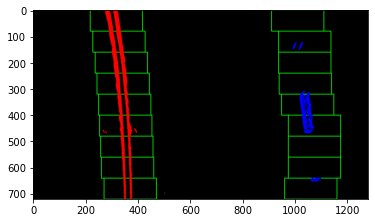

In [6]:
lanes = lane_finder.Lanes(combined_binary)
plot_y, left_fit, right_fit = lanes.fit_polynomial()
pixels_curvature=image_utility.measure_curvature_pixels(plot_y,left_fit,right_fit)
real_curvature = image_utility.measure_curvature_real(plot_y,left_fit,right_fit)
print(pixels_curvature,real_curvature)
plt.imshow(lanes.out_image)

## Plot the vectors inside the windows

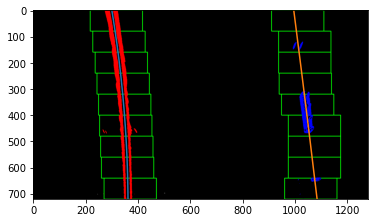

In [7]:
plot_y, left_fit_x, right_fit_x= lanes.generate_plotting_values()
plt.plot(left_fit_x,plot_y)
plt.plot(right_fit_x,plot_y)
plt.imshow(lanes.out_image)

## To dont calculate the windows every time we look on the old points to see if we find a line
For illustration purposes we use the old image

(720, 1280) (720, 1280)
(720, 1280, 3) (25050,) (25050,)


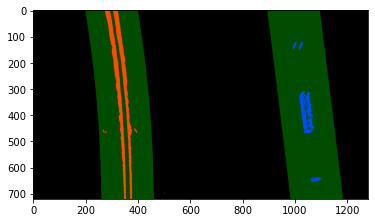

In [11]:
result = lanes.search_around_poly(combined_binary)
plt.imshow(result)